# Image Histograms

These are an incredibly valuable image analysis tool for computer vision as they help us understand the distribution of data associated with an image.
The most common example being to show the range of intensity values.

In this notebook we will demostrate how to create histograms first from grayscale images and then color images, we will then explain how to understand and interpret these plots.

## What Histograms Actually are?

In escence they are collected counts of data organized into bins of predefined width. We specify the number of bins along the **x-axis** to use where a single bin represents a range of values. This is most commonly pixel intensities.

A single bin could be from the range 0 to 9 or 10 to 19 and so on representing the values of pixel intensities from 0 to 255.

Conversely along the **y-axis** we get the count of the number of pixels that match a given bin.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["image.cmap"] = "gray"

The histogram function comes with the matplotlib library the arguments are:

1. **x**: Array or sequence of (n) arrays.
2. **bins**: Defines the number of equal-width bins in the range. This is an optional argument with a default value of 10.
3. **range**: The lower and upper range of the bins, where lower and upper outliers are ignored. This is an optional argument with a default value of **None**, equivalent to using the whole range of the input **x**.

It's also worth noting that if we didn't specify the range the histogram function would have no concept of what the maximum value should be, which is why we have to specify it explicitly.

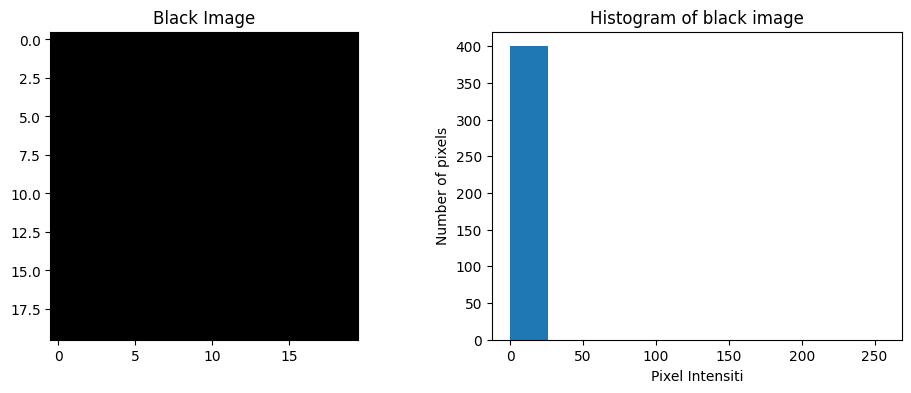

In [3]:
# Create a numpy array 20X20X1 filled with zero values, equivalent to the grayscale image.
black_img = np.zeros((20, 20, 1))

# Flatten the image data into a single 1D array.
black_flatten = black_img.ravel()

# Display the image and histograms.
plt.figure(figsize=(18, 4))

plt.subplot(131); plt.imshow(black_img); plt.title("Black Image")

plt.subplot(132)
plt.hist(black_flatten, range=[0, 256])
plt.xlabel("Pixel Intensiti")
plt.ylabel("Number of pixels")
plt.title("Histogram of black image");

### Create a histogram from a binary image

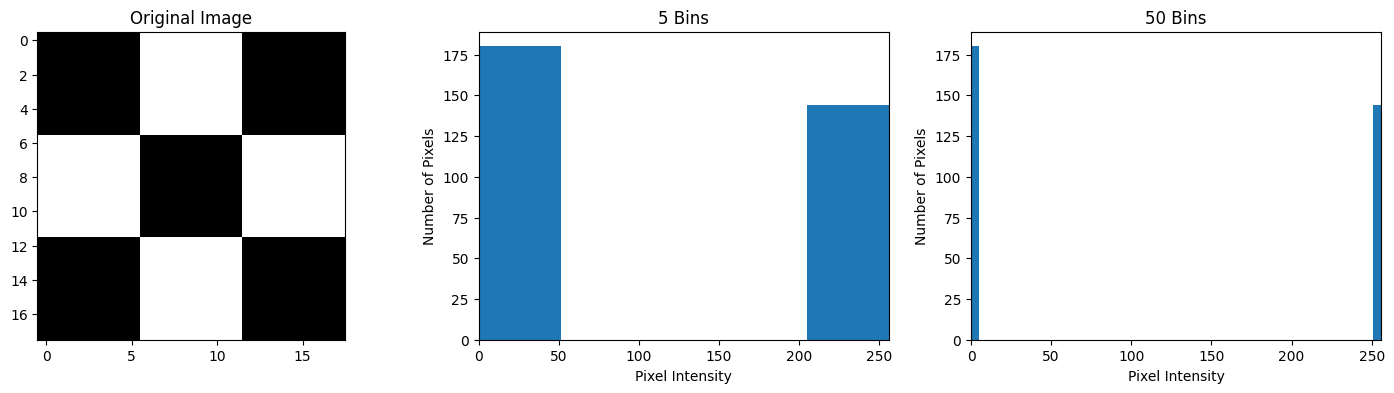

In [4]:
# Read the image.
img = cv2.imread("./checkerboard_18x18.png", cv2.IMREAD_GRAYSCALE)

# Flatten the image data into a single 1D array.
img_flatten = img.ravel()

# Display the image and histograms.
plt.figure(figsize=(18, 4))

plt.subplot(131); plt.imshow(img); plt.title("Original Image")

plt.subplot(132)
plt.hist(img_flatten, 5, range=[0, 256])
plt.xlim([0, 256])
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.title("5 Bins")

plt.subplot(133)
plt.hist(img_flatten, 50, [0, 256])
plt.xlim([0, 256])
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.title("50 Bins");

What this example also illustrates is the importance and use of specifying your bin width and how it actually affects your chart.

In these cases, even though we have five bins in one histogram and fifty in the other the actual heights are exactly the same because the pixels all fell into the first and last bins respectivly for black and white.

In our five bin histogram the first bin represents ranges 0 to 51 whereas in the fifty bin histogram the range is 0 to 5.1

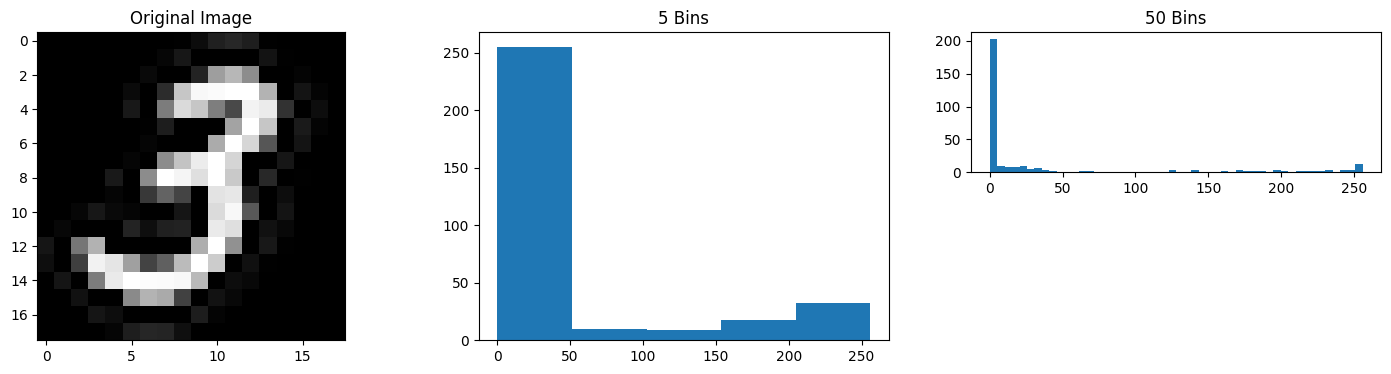

In [5]:
# Read the image.
img = cv2.imread("./MNIST_3_18x18.png", cv2.IMREAD_GRAYSCALE)
img_flatten = img.ravel()

# Display the image and histograms.
plt.figure(figsize=(18, 4))

plt.subplot(131); plt.imshow(img); plt.title("Original Image")
plt.subplot(132); plt.hist(img_flatten, 5, [0, 256]); plt.title("5 Bins")
plt.subplot(233);plt.hist(img_flatten, 50, [0, 256]); plt.title("50 Bins");